# Project-- Classification of electrical stability of power grid networks
Dataset comes from https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#

In the notebook file I try to practice the classification algorithms that I learned in the course.


## Objectives and Attribute Information:


In the dataset, there are 11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
- tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
- p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
- g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
- stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
- stabf: the stability label of the system (categorical: stable/unstable)

Now, load the dataset

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load data from CSV file

In [ ]:
el_sta_df = pd.read_csv('electrical_stability_data.csv',sep=',')
el_sta_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
el_sta_df.shape

(10000, 14)

In [244]:
el_sta_df.duplicated().sum()

0

### About the features and targets of the dataset 
#### Features
- The dataset simulates the four-node star electrical grid with centalized produntion. A generator(producer) is in the center and three consumers(the loads) are connected to it.

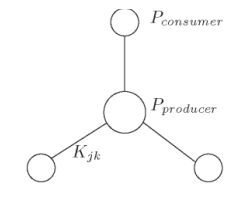
- p1 is power produced by the generator and p2-p4 are powers consumed by each load, so, p1=abs(p2+p3+p4)

- tau1-tau4 are reaction time of each node, the delay between a price change and adaptation of it

- g1-g4 are coefficients of each node, proportional to price elasticity.

#### Targets
- stab is real, if positive - the system is linearly unstable,  negativ- linearly stable

- stabf are label values of the 'stab's

## Pre-processing

### Data visualization 

In [ ]:
# There is no NAN data in the dataset
el_sta_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
el_sta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
el_sta_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

Let's see the distributions of features 
The total power from generator is a normal distribution, and there are few outliners .

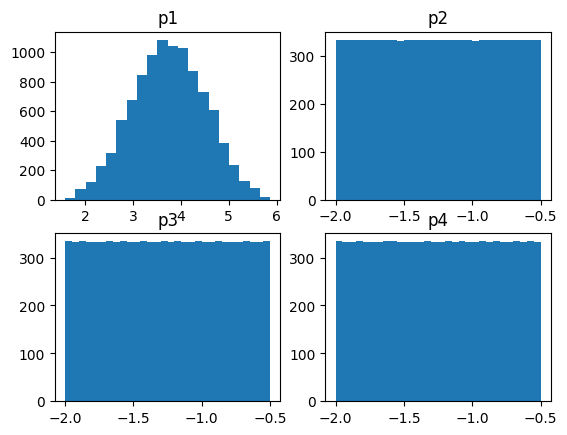

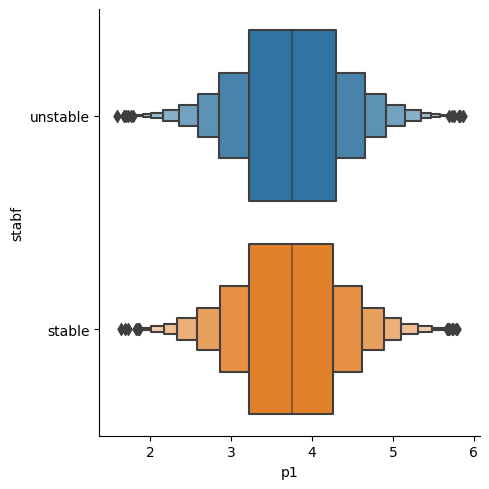

In [ ]:
fig,axes = plt.subplots(2,2)
axes1 = axes[0,0]
axes2 = axes[0,1]
axes3 = axes[1,0]
axes4 = axes[1,1]

axes1.set_title('p1')
axes1.hist(el_sta_df['p1'],bins=20)

axes2.set_title('p2')
axes2.hist(el_sta_df['p2'],bins=30)
axes3.set_title('p3')
axes3.hist(el_sta_df['p3'],bins=30)
axes4.set_title('p4')
axes4.hist(el_sta_df['p4'],bins=30)
sns.catplot(x='p1',y='stabf',kind='boxen',data= el_sta_df)
plt.show()

Now see other varibles distribution


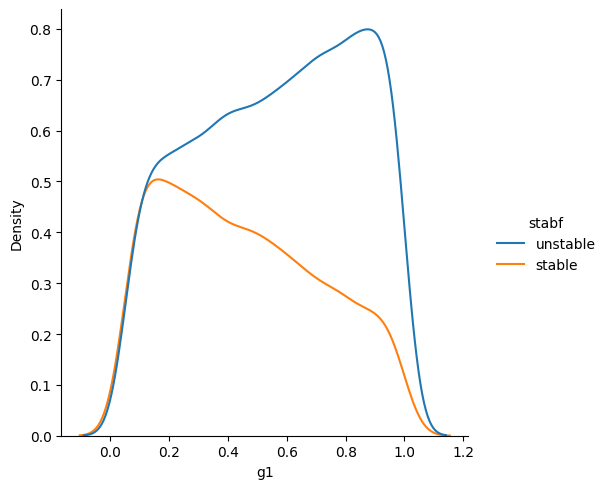

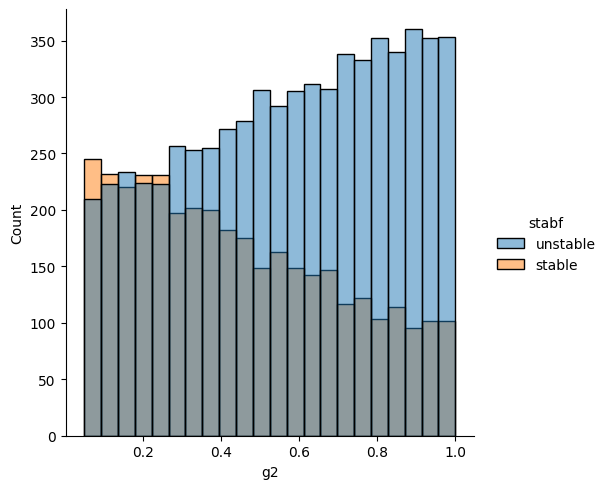

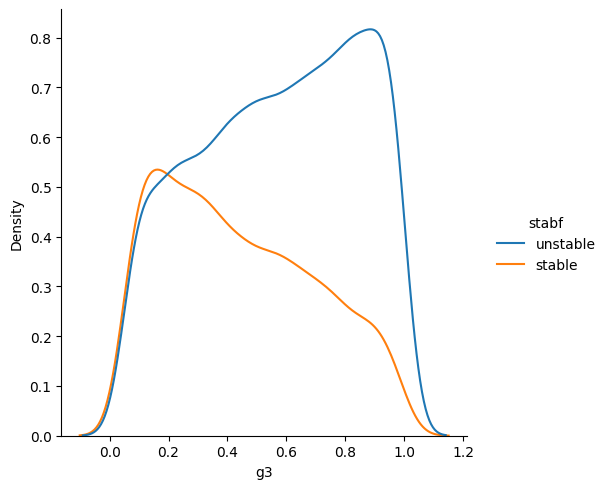

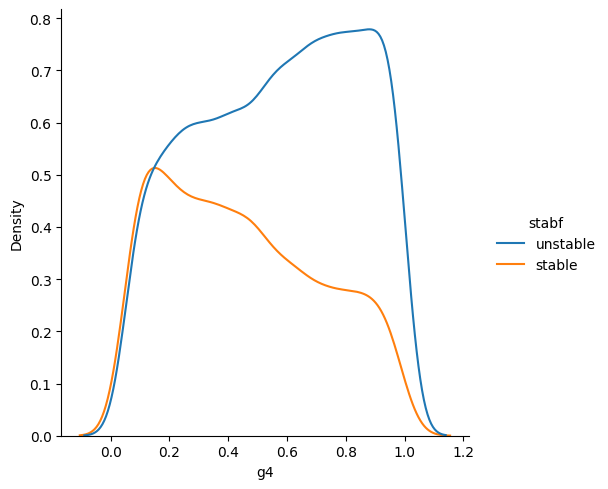

In [ ]:
# From the displot diagrams we can see that when the values of g1(g2,g3,g4)increase, stability becoms worse
sns.displot(data=el_sta_df,hue='stabf',x='g1',kind='kde')

sns.displot(data=el_sta_df,hue='stabf',x='g2')
sns.displot(data=el_sta_df,hue='stabf',x='g3',kind='kde')
sns.displot(data=el_sta_df,hue='stabf',x='g4',kind='kde')


plt.show()

The similar diagrams show that increasing tau (customers and producers reaction time) values will decrease the stabilities.

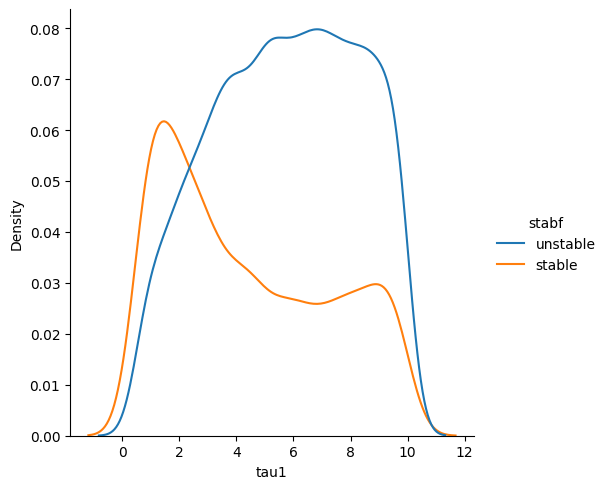

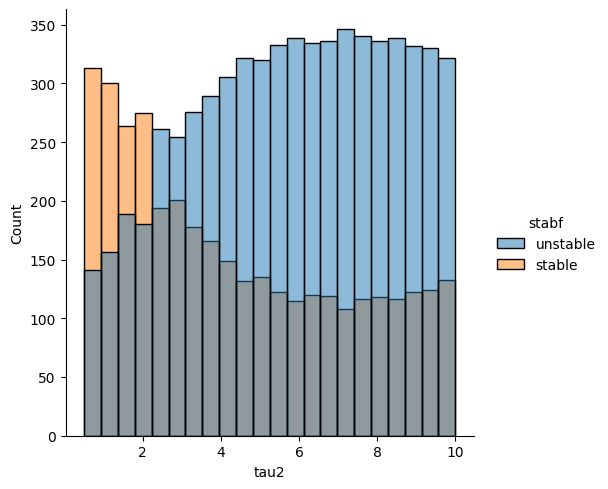

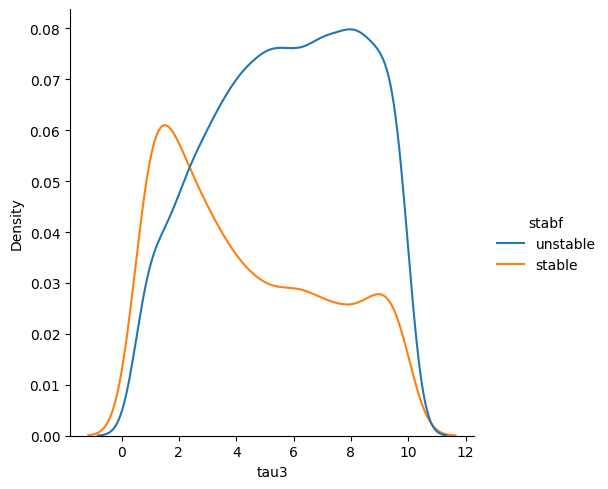

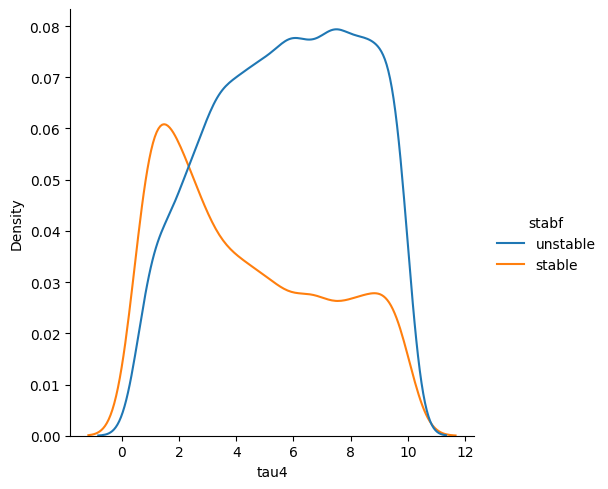

In [ ]:

sns.displot(data=el_sta_df,hue='stabf',x='tau1',kind='kde')

sns.displot(data=el_sta_df,hue='stabf',x='tau2')
sns.displot(data=el_sta_df,hue='stabf',x='tau3',kind='kde')
sns.displot(data=el_sta_df,hue='stabf',x='tau4',kind='kde')

Inspect correlation between our features
we can see from correlations that p1 and p2,p3,p4 have negative linear correlaiton

In [ ]:
corr=el_sta_df.corr(method='pearson')
corr

/var/folders/3d/_ykwgmh97v144k3yyhms0wyr0000gn/T/ipykernel_1231/1202964156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=el_sta_df.corr(method='pearson')


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


<AxesSubplot: >

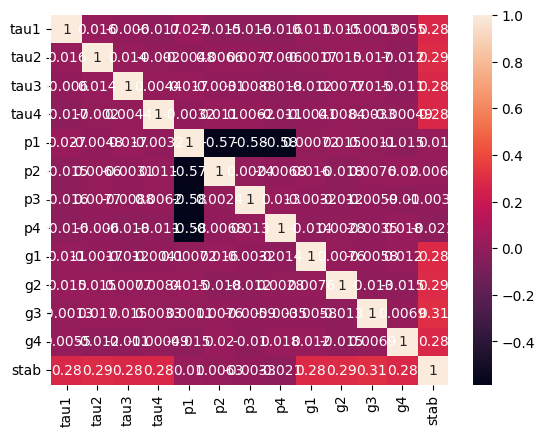

In [ ]:
sns.heatmap(corr,annot=True)

#### From the analysis above we kan see that 
- 'stab' and 'stabf', we can keep one of them as target, stab for regression and stabf for classification
-  p1 and p2,p3,p4 are linear correlated and so we can only keep p1 as feature , or remove it and keep p2,p3,p4 when we use algrithm methods

### Feature selection

Classification, from the features:
- Remove p2,p3,p4
- Remove stab,keep stabf and convert it to numerical value

In [ ]:

X_clf = el_sta_df[['p1','tau1','tau2','tau3','tau4','g1','g2','g3','g4']]
y_clf = el_sta_df['stabf']
X_clf[0:5]


,p1,tau1,tau2,tau3,tau4,g1,g2,g3,g4
0,3.763085,2.959060,3.079885,8.381025,9.780754,0.650456,0.859578,0.887445,0.958034
1,5.067812,9.304097,4.902524,3.047541,1.369357,0.413441,0.862414,0.562139,0.781760
2,3.405158,8.971707,8.848428,3.046479,1.214518,0.163041,0.766689,0.839444,0.109853
3,3.963791,0.716415,7.669600,4.486641,2.340563,0.446209,0.976744,0.929381,0.362718
4,3.525811,3.134112,7.608772,4.943759,9.857573,0.797110,0.455450,0.656947,0.820923


In [ ]:
# unstable:1 and stable:0
#y_clf = pd.factorize(y_clf)[0].astype(np.int16) 

temp = {'unstable':1,'stable':0}
y_clf =pd.Series(list(map(lambda  val: temp[val],y_clf)))

y_clf[0:5]

0    1
1    0
2    1
3    1
4    1
dtype: int64

### Training and Validation dataset

Split the data into training data and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_clf_train, X_clf_test,y_clf_train,y_clf_test = train_test_split(X_clf,y_clf,test_size=0.25,random_state=123)
print('Training data:', X_clf_train.shape, y_clf_train.shape)
print('Test data:',X_clf_test.shape,y_clf_test.shape)

Training data: (7500, 9) (7500,)
Test data: (2500, 9) (2500,)


#### Normalize Data
To prevent information leakage of test data,  I didn't fitted all the data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_clf_train)
X_clf_train_std = scaler.transform(X_clf_train)
X_clf_test_std = scaler.transform(X_clf_test)



## Model building and evaluation

The following algorithm will be used:
  - Logistic Regression
  - Naive Bayes
  - K Nearest Neighbor(KNN)
  - Support Vector Machine(SVM)
  - Decision Tree
  - Random Forest(RF)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_clf_train_std,y_clf_train)
y_clf_pred = logreg.predict(X_clf_test_std)
print(logreg.score(X_clf_test_std,y_clf_test))

print(classification_report(y_clf_test,y_clf_pred))
print(confusion_matrix(y_clf_test,y_clf_pred))

0.8176
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       918
           1       0.83      0.89      0.86      1582

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.82      0.82      0.82      2500

[[ 639  279]
 [ 177 1405]]


In [ ]:
# use cross validation to see the training socres
# It seems that the test result score are close to the training score
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logreg,X_clf_train_std,y_clf_train,cv=5,scoring='accuracy')
cv_results.mean()

0.8134666666666666

In [ ]:
## classification report and confusion matrix

def evaluation(clf_method,Xtest,ytest):
    score = clf_method.score(Xtest,ytest)
    y_pred =clf_method.predict(Xtest)
    print('classfication report:\n',classification_report(ytest,y_pred))
    print(confusion_matrix(ytest,y_pred))
    return score

In [ ]:
# show the ROC curve

from sklearn.metrics import auc,roc_curve,accuracy_score

def Roc_curve(clf_method,Xtest,ytest):
    probs = clf_method.predict_proba(Xtest)
    y_pred = probs[:,1]

    fpr,tpr,thresholds_keras =roc_curve(ytest,y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver operating characteristic')
    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc = 'upper right')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

In [227]:
# Use GridSearchCV to optimize the LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg_p1 = LogisticRegression()
penaltys = ['l1','l2']
Cs = [0.001,0.01,0.05,0.1,0.5,1,5,10,100]
solver =['liblinear']
parameters = dict(penalty =penaltys,C=Cs,solver=solver)
grid_sear_cv = GridSearchCV(logreg_p1,param_grid= parameters,cv=5,scoring='accuracy')
grid_sear_cv.fit(X_clf_train_std,y_clf_train)
#print(grid_sear_cv.cv_results_)
print(grid_sear_cv.best_score_)
print(grid_sear_cv.best_params_)


penaltys = ['l2']
Cs = [0.001,0.01,0.05,0.1,0.5,1,5,10,100]
solver =['lbfgs']
parameters = dict(penalty =penaltys,C=Cs,solver=solver)
grid_sear_cv = GridSearchCV(logreg_p2,param_grid= parameters,cv=5,scoring='accuracy')
grid_sear_cv.fit(X_clf_train_std,y_clf_train)
#print(grid_sear_cv.cv_results_)
print(grid_sear_cv.best_score_)
print(grid_sear_cv.best_params_)

0.8138666666666665
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.8142666666666667
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [230]:
# The second model seems little better
logreg_p =LogisticRegression(C=0.01, penalty='l2',solver='lbfgs')
logreg_p.fit(X_clf_train_std,y_clf_train)
y_clf_pred_p=logreg_p.predict(X_clf_test_std)
evaluation(logreg_p,X_clf_test_std,y_clf_test)


classfication report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       918
           1       0.83      0.89      0.86      1582

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.79      2500
weighted avg       0.81      0.82      0.81      2500

[[ 624  294]
 [ 168 1414]]


0.8152

In [242]:
logreg_p.score(X_clf_train_std,y_clf_train)

0.8138666666666666

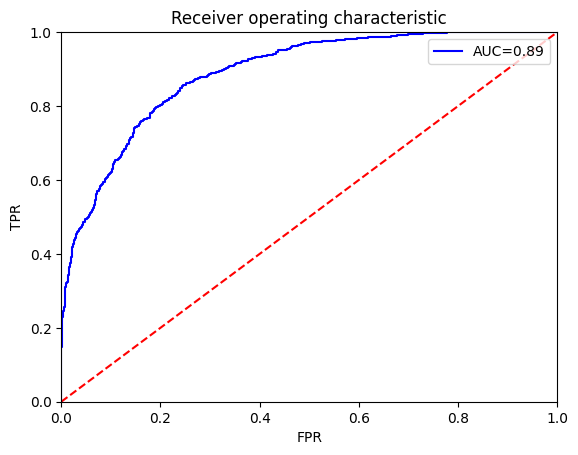

In [233]:

Roc_curve(logreg_p,X_clf_test_std,y_clf_test)

### Naive Bayes
- Since all the features are continuous values, so it's better to use GaussianNB method

In [238]:

from sklearn.naive_bayes import GaussianNB
nbys_clf = GaussianNB()
nbys_clf.fit(X_clf_train_std,y_clf_train)
y_clf_nbys = nbys_clf.predict(X_clf_test_std)
nbys_clf.score(X_clf_test_std,y_clf_test)


0.8292

In [ ]:
#Naive Bayes model has better predict values than Logistic Regression'

score = evaluation(nbys_clf,X_clf_test_std,y_clf_test)
print('The accuracy score:',score)

classfication report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74       918
           1       0.82      0.93      0.87      1582

    accuracy                           0.83      2500
   macro avg       0.84      0.79      0.80      2500
weighted avg       0.83      0.83      0.82      2500

[[ 596  322]
 [ 105 1477]]
The accuracy score: 0.8292


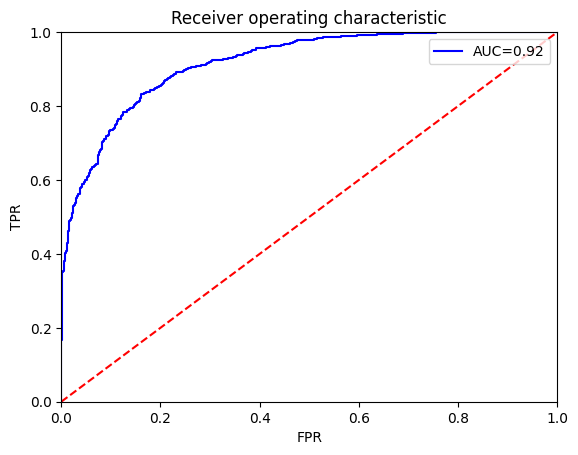

In [ ]:
Roc_curve(nbys_clf,X_clf_test_std,y_clf_test)

### KNN(K_Nearest_Neighbor)

- Utilize Grid search to get best k and weight

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#including 2 groups hyperparameters
# get the best parameters
param_grid = [
    {'weights':['uniform'],
     'n_neighbors': [i for i in range(1,15)]},
     {'weights':['distance'],
      'n_neighbors':[i for i in range(1,15)]}
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,param_grid=param_grid)
grid_search.fit(X_clf_train_std,y_clf_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

KNeighborsClassifier(n_neighbors=14)
{'n_neighbors': 14, 'weights': 'uniform'}


In [ ]:
print(grid_search.best_score_)

0.8981333333333333


In [239]:
# From the valuation result, KNN is better than LogisiticRegression
knn_clf=grid_search.best_estimator_
y_clf_pred = knn_clf.predict(X_clf_test_std)
knn_clf.score(X_clf_test_std,y_clf_test)
print(classification_report(y_clf_test,y_clf_pred))
print(confusion_matrix(y_clf_test,y_clf_pred))


              precision    recall  f1-score   support

           0       0.91      0.79      0.84       918
           1       0.89      0.96      0.92      1582

    accuracy                           0.89      2500
   macro avg       0.90      0.87      0.88      2500
weighted avg       0.89      0.89      0.89      2500

[[ 722  196]
 [  70 1512]]


In [ ]:
eval = evaluation(knn_clf,X_clf_test_std,y_clf_test)
print('KNN accuracy score:',eval)


classfication report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       918
           1       0.89      0.96      0.92      1582

    accuracy                           0.89      2500
   macro avg       0.90      0.87      0.88      2500
weighted avg       0.89      0.89      0.89      2500

[[ 722  196]
 [  70 1512]]
KNN accuracy score: 0.8936


In [241]:
knn_clf.score(X_clf_train_std,y_clf_train)

0.9237333333333333

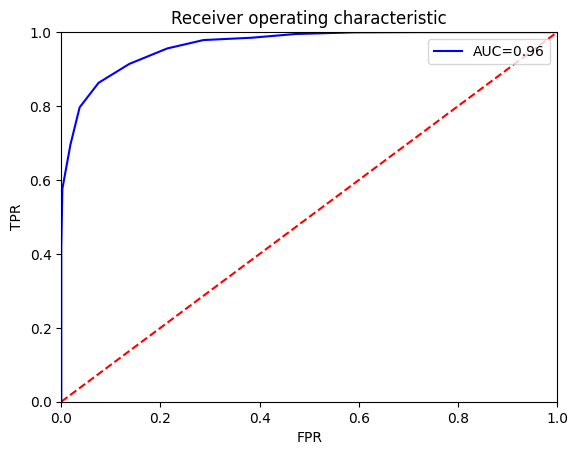

In [ ]:
Roc_curve(knn_clf,X_clf_test_std,y_clf_test)

### SVM (Support Vector Machine)

- It's a classification ,so SVC is selected.
- Train the SVM model with training dataset. When build the SVM model, the important parameters are C and kernel, and different kernel functions have other different parameters. T.ex, for 'rbf': gamma , for 'poly': degree. They all impact on   SVM model and its accuracy. So I will utilize GridSearchCV to find the best parameters.

In [189]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

#max_iter is set to be 1000000 to save fitting time
params = [
    {'kernel':['linear'],'C':[0.1,1,10],'max_iter':[1000000]},
    {'kernel':['poly'],'C':[0.1,1,10,100],'degree':range(2,5),'max_iter':[1000000]},
    {'kernel':['rbf'],'C':[0.1,1,10,100],'gamma':[10,1,0.1,0.001,0.0001]}
]

grid_search_svc = GridSearchCV(SVC(random_state=12,probability=True),param_grid=params,cv=5)
grid_search_svc.fit(X_clf_train_std,y_clf_train)
print('GridSearchCV Attibutes:')
#print('cv_results:',grid_search_svc.cv_results_.keys())
print('best_estimator:',grid_search_svc.best_estimator_)
print('best parameters:',grid_search_svc.best_params_)
print('best score:',grid_search_svc.best_score_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScale

GridSearchCV Attibutes:
best_estimator: SVC(C=10, gamma=0.1, probability=True, random_state=12)
best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best score: 0.9706666666666667


In [190]:
svc_grid = grid_search_svc.best_estimator_
print('Test data score:',svc_grid.score(X_clf_test_std,y_clf_test))

Test data score: 0.9724


In [240]:
print('Test data score:',svc_grid.score(X_clf_train_std,y_clf_train))

Test data score: 0.9945333333333334


In [191]:
# check the confusion matrix and ROC curve
eval = evaluation(svc_grid,X_clf_test_std,y_clf_test)


classfication report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       918
           1       0.98      0.97      0.98      1582

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500

[[ 890   28]
 [  41 1541]]


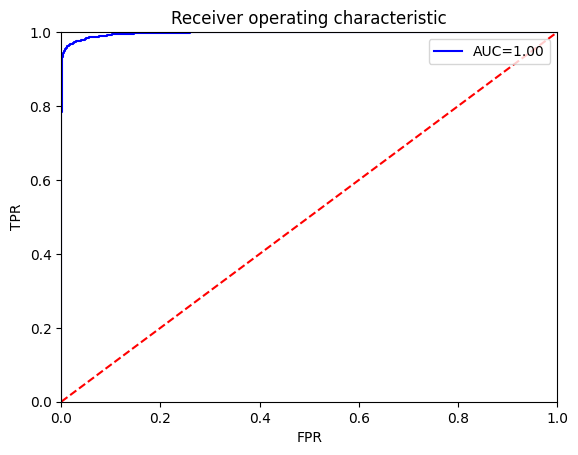

In [192]:
Roc_curve(svc_grid,X_clf_test_std,y_clf_test)

In [180]:
from sklearn.model_selection import RandomizedSearchCV
param_dis = {
             'kernel':['rbf'],
             'C':np.logspace(-1,3,8),
             'gamma':[10,1,0.1,0.001,0.0001]
}
random_search_svc= RandomizedSearchCV(SVC(random_state=12),param_distributions=param_dis,cv=5)
random_search_svc.fit(X_clf_train_std,y_clf_train)
print('best_estimator:',random_search_svc.best_estimator_)
print('best parameters:',random_search_svc.best_params_)
print('best score:',random_search_svc.best_score_)

best_estimator: SVC(C=5.17947467923121, gamma=0.1, random_state=12)
best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 5.17947467923121}
best score: 0.97


In [184]:
svc_random = random_search_svc.best_estimator_
print(svc_random.score(X_clf_test_std,y_clf_test))

0.9704


### Decision Tree

- As Decision Tree and ensemble method - RandomForest are not sensitive to the variance in the data and what the methods care about is not the value of the variable, but the distribution of the variable and the conditional probability between the variables, the features data don't need to be scaled. So, in the method fitting, traning data and test data before scaling are used.



In [156]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=12)
tree_clf.fit(X_clf_train,y_clf_train)
y_clf_pred = tree_clf.predict(X_clf_test)
print('training data score :',tree_clf.score(X_clf_train,y_clf_train))
print('test data score:',tree_clf.score(X_clf_test,y_clf_test))

training data score : 1.0
test data score: 0.862


From the score above , we can see that the model is litte overfitting, that is to say decision tree can classify very well for training data,but for the unknown test data , performence decrease obviously. so some parameters of model needs to be adjusted.

Among Decision tree parameters , max_depth, max_leaf_nodes,min_samples_split are searched with GridSearchCV.

In [174]:
params ={
    'max_depth': np.arange(1,15),
    'min_samples_leaf': np.arange(1,10,2),
    
}
tree_clf_g = DecisionTreeClassifier(random_state=12)
grid_search = GridSearchCV(tree_clf_g,param_grid=params,cv=5)
grid_search.fit(X_clf_train,y_clf_train)
print('GridSearch best score:',grid_search.best_score_)
print('GridSearch best parameters:',grid_search.best_params_)



GridSearch best score: 0.8536000000000001
GridSearch best parameters: {'max_depth': 12, 'min_samples_leaf': 5}


In [175]:
tree_clf_g=grid_search.best_estimator_
print('Test score with best parameters:',tree_clf_g.score(X_clf_test,y_clf_test))

Test score with best parameters: 0.8692


ERROR! Session/line number was not unique in database. History logging moved to new session 70


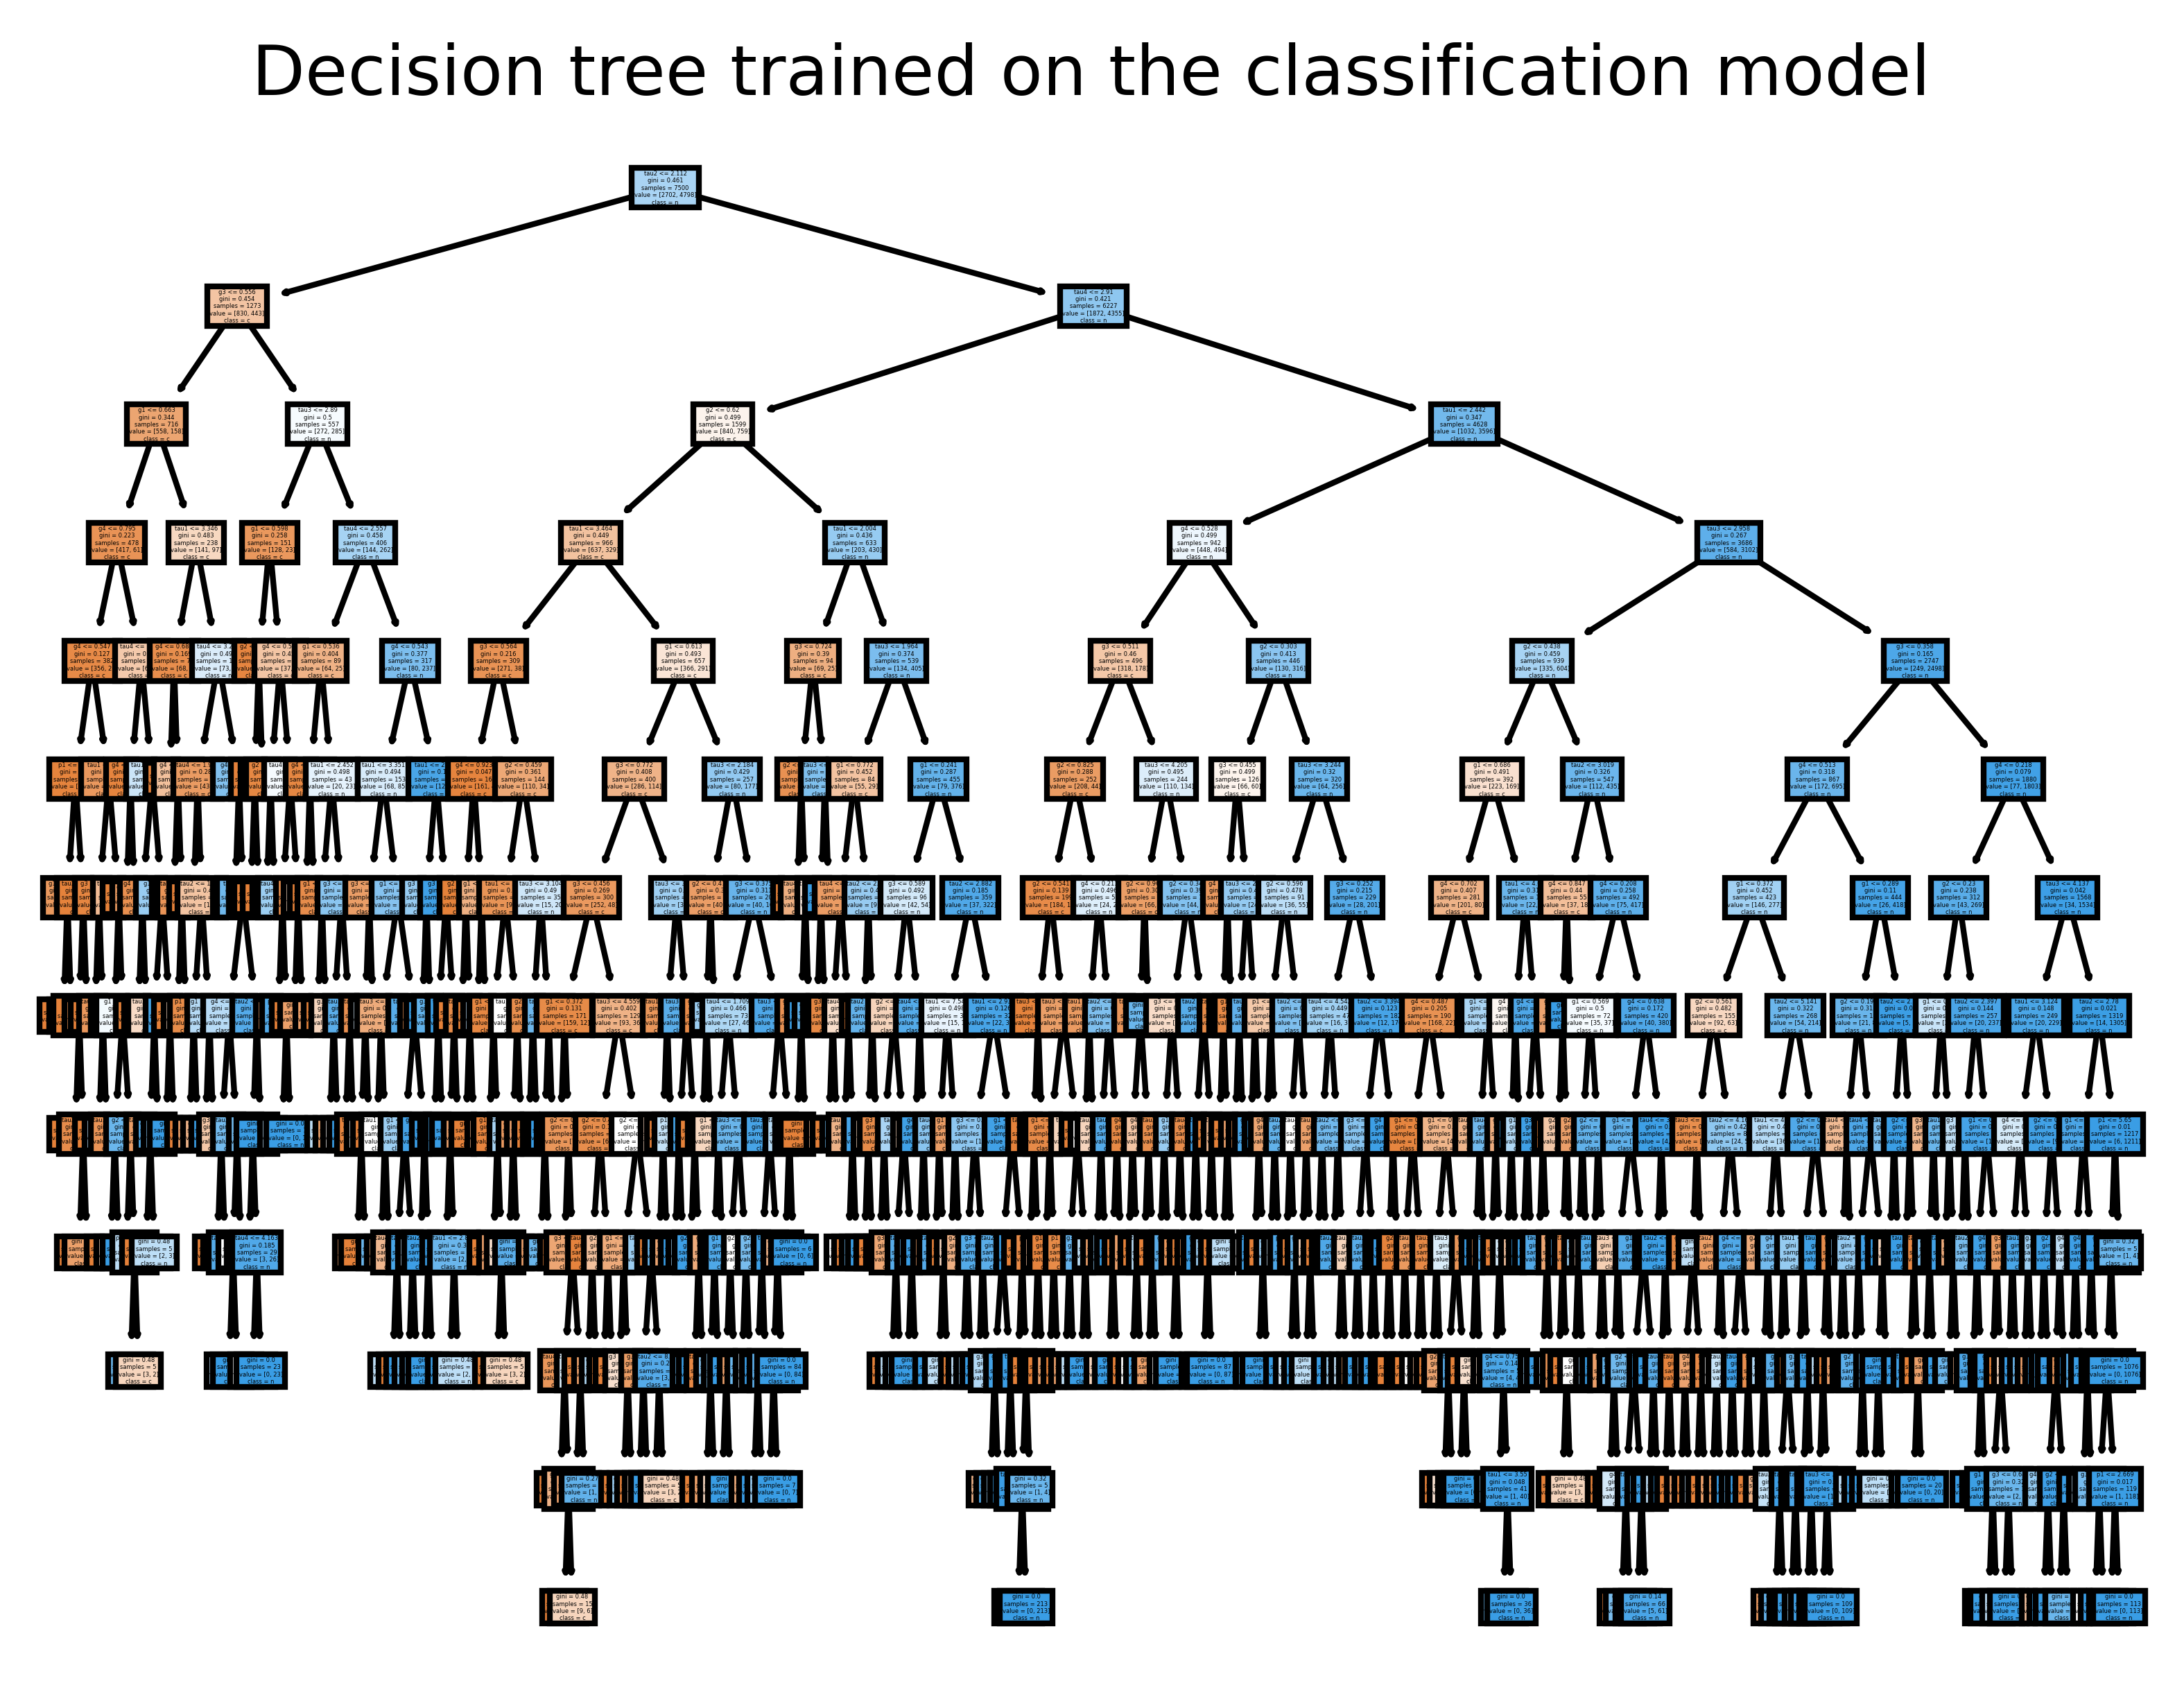

In [247]:

# Decision tree constructure figure

from sklearn.tree import plot_tree

fn = feature_names
cn= ['stable','unstable']
fig,axes = plt.subplots(nrows =1,ncols=1,dpi=600)
plot_tree(tree_clf_g,filled=True,feature_names=fn,class_names='cn')
plt.title('Decision tree trained on the classification model')
plt.show()



In [248]:
fig.savefig('electricity_tree.png')

In [213]:
importances = tree_clf_g.feature_importances_
importances

array([0.00678845, 0.12801736, 0.1519133 , 0.13156603, 0.12726545,
       0.11762919, 0.12209952, 0.10290047, 0.11182024])

In [216]:
feature_names = X_clf.columns.to_list()
feature_names

['p1', 'tau1', 'tau2', 'tau3', 'tau4', 'g1', 'g2', 'g3', 'g4']

<bound method Figure.tight_layout of <Figure size 640x480 with 1 Axes>>

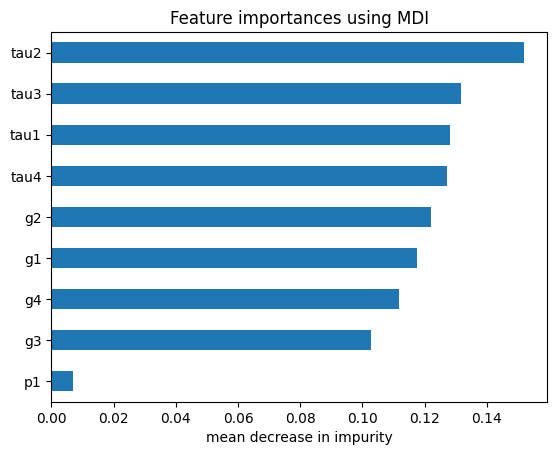

In [218]:
#  Take a look at the importances of features

feature_names = X_clf.columns.to_list()
importances = tree_clf_g.feature_importances_
tree_importances = pd.Series(importances,index =feature_names)
tree_importances=tree_importances.sort_values(ascending=True)
fig,ax = plt.subplots()
tree_importances.plot.barh(ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_xlabel('mean decrease in impurity')

fig.tight_layout


The reaction time(tau) have greater impact on the stable situation of node than coefficient gamma(g) which is proportional to the price elasticity, and the power is less important, that importance ranking is based on the fact that all the powers are during rational range.

classfication report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       918
           1       0.89      0.90      0.90      1582

    accuracy                           0.87      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.87      0.87      0.87      2500

[[ 742  176]
 [ 151 1431]]


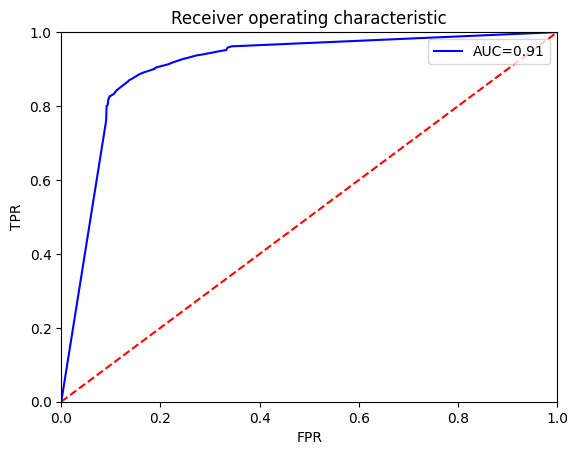

In [223]:
# confusion matrix and Roc curve
evaluation(tree_clf_g, X_clf_test,y_clf_test)
Roc_curve(tree_clf_g,X_clf_test,y_clf_test)

### Random forest (RF)

Single decision tree model has overfitting problem, so we try to use Random forest to utilize more strong ensemble model overcome it.

In [193]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_clf_train,y_clf_train)

print('training data score:',rf_clf.score(X_clf_train,y_clf_train))
print('Test data score:',rf_clf.score(X_clf_test,y_clf_test))

training data score: 1.0
Test data score: 0.9212


Randomforest has better predict score than decision tree for test data, but we still need to determine the best parameter,so again we use hyperparameter tuning method to search best parameters and optimize the model. 

In [206]:
# Search optimal hyperparameter
# There are many hyperparameters which need to be searched so at first, try to use RandomsearchCV which is more quich than GridSearchCV to get the range roughly.
n_estimators = [int(x) for x in np.linspace(start=20, stop=500, num=60)]
max_features= ['sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=3,stop=100,num=50)]
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4,6,9]


param_dis = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_sample_split,
    'min_samples_leaf' :min_sample_leaf,
    
}

rf_clf_s= RandomForestClassifier(random_state=12)
random_search = RandomizedSearchCV(rf_clf_s,param_distributions=param_dis,cv =5)
random_search.fit(X_clf_train,y_clf_train)
print( 'Random Search best score:',random_search.best_score_)
print('Random search best parameters:',random_search.best_params_)
print('Random Search best estimator',random_search.best_estimator_)

Random Search best score: 0.9208000000000001
Random search best parameters: {'n_estimators': 410, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18}
Random Search best estimator RandomForestClassifier(max_depth=18, n_estimators=410, random_state=12)


Although the training score are getting smaller but the model has a better test pridict score, this new model have better generalization ability.

In [207]:
rf_clf_r = random_search.best_estimator_
print(rf_clf_r.score(X_clf_test,y_clf_test))

0.9236


Now we use GridSearchCV to continue search in the above range to get the globaly optimal parameters

In [209]:
grid_params= {
    'n_estimators': [350,410,500],
    'min_samples_split':[2,3],
    'min_samples_leaf': [1,2],
    'max_features':['sqrt'],
    'max_depth':[10,18,25,30]
    }

rf_clf_g = RandomForestClassifier(random_state=12)
grid_search = GridSearchCV(rf_clf_g,param_grid=grid_params,cv=5)
grid_search.fit(X_clf_train,y_clf_train)
print( 'Grid Search best score:',grid_search.best_score_)
print('Grid search best parameters:',grid_search.best_params_)
print('Grid Search best estimator',grid_search.best_estimator_)

Grid Search best score: 0.9218666666666667
Grid search best parameters: {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Grid Search best estimator RandomForestClassifier(max_depth=18, n_estimators=500, random_state=12)


In [220]:
rf_clf_g = grid_search.best_estimator_
print(rf_clf_g.score(X_clf_test,y_clf_test))

0.9216


<bound method Figure.tight_layout of <Figure size 640x480 with 1 Axes>>

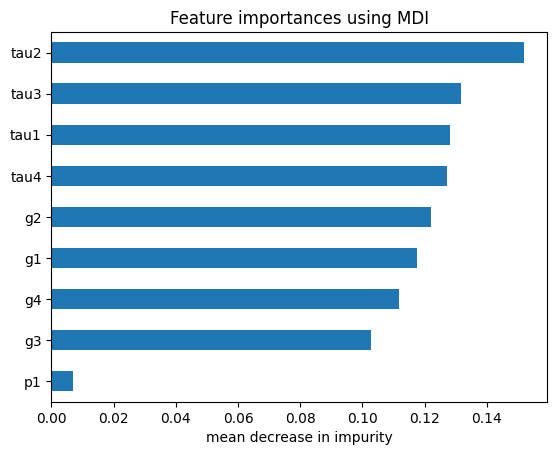

In [222]:
#  Take a look at the importances of features


importances = rf_clf_g.feature_importances_
rf_importances = pd.Series(importances,index =feature_names)
rf_importances=tree_importances.sort_values(ascending=True)
fig,ax = plt.subplots()
tree_importances.plot.barh(ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_xlabel('mean decrease in impurity')

fig.tight_layout

Random forest model has the similar importance ranking with decision tree model.

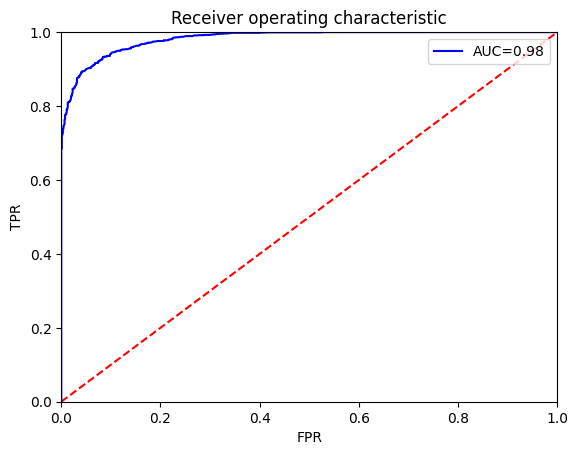

In [226]:
# confusion matrix and Roc curve

Roc_curve(rf_clf_g,X_clf_test,y_clf_test)

In [225]:
evaluation(rf_clf_g, X_clf_test,y_clf_test)

classfication report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       918
           1       0.92      0.96      0.94      1582

    accuracy                           0.92      2500
   macro avg       0.92      0.91      0.91      2500
weighted avg       0.92      0.92      0.92      2500

[[ 792  126]
 [  70 1512]]


0.9216

Compared with Decision tree , Random forest model shows better predictive performance.

## Model Comparison and Selction

Compare all the algorithm models we have used.

| Algorithm          | Accuracy | precision | recall | F1-score | AUC  | time |
| ------------------ | -------- | --------- | ------ | -------- | ---- | ---- |
| LogisticRegression |   0.82   |   0.83    | 0.89   |   0.86   | 0.89 | 1.3s |
| NaiveBayes         |   0.83   |   0.82    | 0.93   |   0.87   | 0.92 | 0s   |
| KNN                |   0.89   |   0.89    | 0.96   |   0.92   | 0.96 | 7.6s |
| SVM                |   0.97   |   0.98    | 0.97   |   0.98   |  1   | 13m  |
| DecisionTree       |   0.87   |   0.89    | 0.90   |   0.90   | 0.91 | 8.1s |
| RandomForest       |   0.92   |   0.92    | 0.96   |   0.94   | 0.98 | 16m  |

- precision,recall,f1-score are values for class "1",unstable status. 
- "time" includs hyperparameter search time, fitting and preditive time

KNN could be the best suitable classification model for the data

- From the table,KNN has relatively higher accuracy(although not the highest) and good AUC

- we only have 9 features,  KNN model can handle the inputs well

- KNN model is easy to undstand and only have 1 hyperparameter which needs to be determined. KNN model has higher interpretablity and less complexity in comparision with SVM ,Decision tree and Randomforest model

- Although SVM has highest accuracy and perfect AUC, but it has more hyperparameters which need more seach time with both Grid search method and Random search method

- KNN has similar accuracy between training data and test data, from this point it has good generalization ability

- In the case unstable status is more concerned. the recall rate of "unstable" show that KNN has as good performance for the data as other complex models


## Project Report

Author and group member: Meijuan Xia

### Dataset analysis and preprocessing

- Electrical grids require a balance between electricity supply and demand in order to be stable.The dataset simulates the four-node star electrical grid with centalized produntion. It is a simulated dataset in the Decentral Smart Grid Control system(DSGC), project try to build a model the the system and see how the inputs (behavior) impact the stability.

- Dataset havs 12 features and 2 goals, no null values all the featurs have continous float values and no duplicate rows.

- After correlation check, 9 features and 1 target are kept and transform the target values into int type, 1 means grid node is unstable, 0 means stable status

- Scales the feature values with standardscaler in order to get better performances

### Model selection and evaluations

- It is a binary classification, I selected several regular algorithms to build different models.
- To evaluate the models, confusion matrix, accuracy score and ROC curve are used
- Considering the interpretability,complexity and generalization ability, KNN model is more suitable for the dataset.
 

### Chanllenges and further improvement

- Before using the methods I would read the theories of the algoriths. They're all about mathmetics formulas and resonnings. It's tough and took a long time :(, but it can help me to understand the algorithm

- Selecting hyperparameters to optimize the models is a big chanllenge for me, I used grid search method and random search method with cross validation. But the problem is how to determine the hyperparameters range which the GridSearchCV and RandomSearch CV will search to get the best parameters with. Especially for SVC and Decision tree models. I read some articles and examples, many of them set the range from experiences. So I tried to fit the search method with different range. But if we set more values in grid search and there are many hyperparameters it will become a huge preocessing and needs a long time to fit. T.ex, SVM(kernel,degree,C,gamma,etc.). I decrease the search numbers (selected not all but 3-5 parameters according to the degree of influence on the models) to decrease the fitting time. Random forest and Decision tree have the same issue. I tried firstly use RandomSearchCV to get the approximate range of the best parameters and then used the GridSearchCV to find the global optimal prameters in the range. It seems to work. It takes much less time.

- I select the KNN as more suitable model for its interpretablity and classification score. The dataset only have 100000 observations and 9 features, so KNN has its own advantages with the numbers. If the numbers becomes much great I am not sure KNN can still have such good performance.

- The data set could be simulated data with 4-node electricity grid. The data seem to be ideal and not complicated. It is used to explore DSGC system methods and concise models to get stable electricity grids between electricity supply and demand.

